In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ckqst = pd.read_csv("../results_remote/output_places_US_ckqstv2_preloaded.csv")
fast = pd.read_csv("../results_remote/output_places_US_adoptckqst_preloaded.csv")


res = pd.concat([
    fast.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    ckqst.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])
# res = res[res['name'].isin(['legacy_fast', 'legacy_ckqst'])]

name_map = {
    "adopt_NO": "FAST",
    "ckqst_NO": "AOIQ",
}
res['name'] = res['name'].apply(lambda x: name_map[x])

res

FileNotFoundError: [Errno 2] No such file or directory: '../results_remote/output_places_US_ckqstv2_preloaded.csv'

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Index creation time (sec)'>

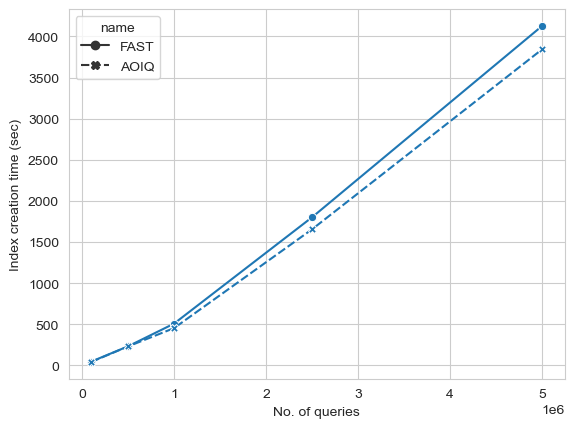

In [3]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [4]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
1,223424777178,1.421476e+06,500000,FAST
6,242493367455,1.518107e+06,500000,FAST
1,231754084451,1.214807e+06,500000,AOIQ


In [5]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
3,1693739305104,5768479790133,2500000,FAST
8,1910774963050,6263675813675,2500000,FAST
3,1656058955132,4489929018606,2500000,AOIQ


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Query Matching Time (nano sec)'>

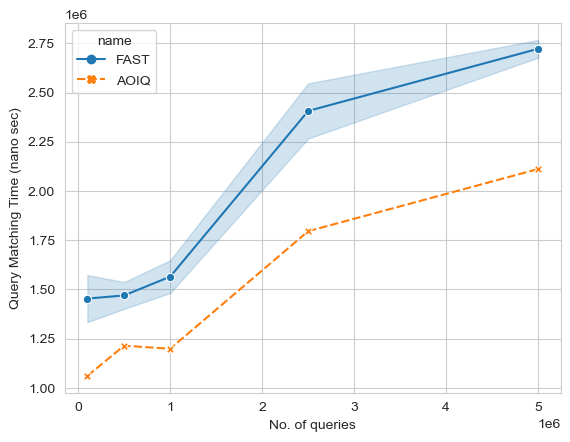

In [6]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (nano sec)'] = search_res['search_time'].apply(lambda x: x) / search_res['num_queries']
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (nano sec)', hue='name', style='name', data=search_res, errorbar="sd", markers=True)

In [7]:
# Optimization
# - Custom iterator
# - Circle bound calculation